In [4]:
# reload scripts
try:
    os.chdir(ROOT_DIR)
except:
    pass
%run moment_calculation.py
%run dataset.py
%run summary_portfolio_stats.py
%run coronavirus_data.py
plt.style.use('ggplot')
%matplotlib inline

In this notebook, we explore the impact of widespread Robinhood trading on the macroscopic level. We focus on daily data, and study whether trading activity on Robinhood has some impact on market features. We focus especially on the  implications of Robinhood trading in terms of financial risk management.

# Exploration on the stock level

## Get all the Robinhood stock trading data available

### Getting the names of the stocks that are available on Robinhood's database

In [5]:
tickers = get_available_tickers()

In [6]:
print("We have data for a total of {} different stocks.".format(len(tickers)))

We have data for a total of 8597 different stocks.


### Making a dataset with end of day Robinhood user data for these stocks 

For the study of macroscopic effect, we will focus on end of day number of users who own any particular stock.

In [7]:
robinhood_popularity = merged_daily_usage_data(tickers)

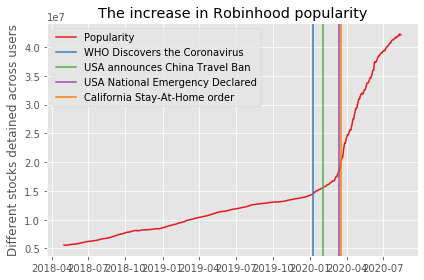

In [8]:
robinhood_popularity.sum(axis=1).plot(label='Popularity', c=cmap(0))
plt.title("The increase in Robinhood popularity")
plt.ylabel("Different stocks detained across users")
for (event, date), col in zip(EVENTS.items(), range(1, 5)):
    plt.axvline(x=date, label=event, c=cmap(col))
plt.legend()
plt.tight_layout()

We can see that the true trigger of the increase in the number of Robinhood users is the stay-at-home order. It seems people started trading massively after they had to stay at home. 

### Overview of stock that are most traded on Robinhood

Here are the most popular stocks at the beginning and at the end of the observation period (by number of users who own them).

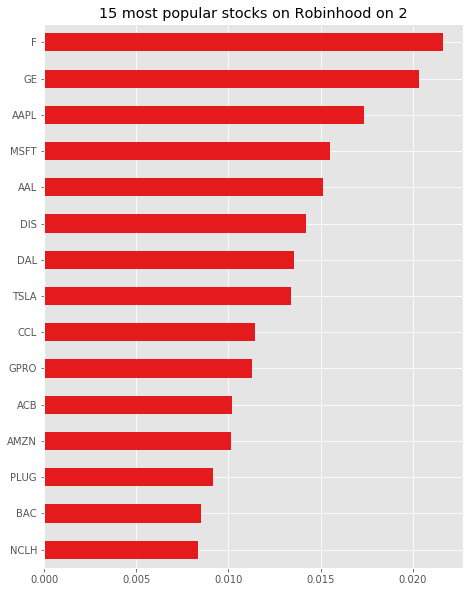

In [10]:
most_popular_end = most_popular_stocks(robinhood_popularity)

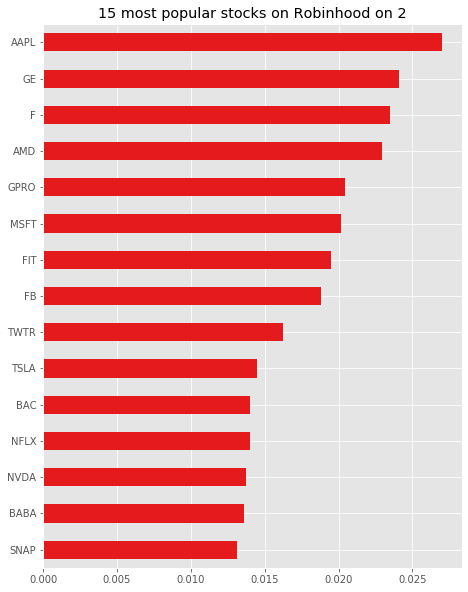

In [11]:
most_popular_start = most_popular_stocks(robinhood_popularity, date=robinhood_popularity.index[0])

## Volatility patterns of individual stocks

### Visual exploration - Stock prices history for most popular stocks on Robinhood

Let us first plot return series for the 15 most popular stocks on Robinhood (as of the start of the dataset), as well as the level of popularity for these, and see whether we can find some patterns.

In [13]:
fifteen_most_popular = most_popular_start.keys()[:15].tolist()
get_price_data(tickers=fifteen_most_popular)

AAPL
Already have AAPL
GE
Already have GE
F
Already have F
AMD
Already have AMD
GPRO
Already have GPRO
MSFT
Already have MSFT
FIT
Already have FIT
FB
Already have FB
TWTR
Already have TWTR
TSLA
Already have TSLA
BAC
Already have BAC
NFLX
Already have NFLX
NVDA
Already have NVDA
BABA
Already have BABA
SNAP
Already have SNAP


In [14]:
most_popular_prices = compile_price_data(tickers=fifteen_most_popular, title_ext='most_popular')
most_popular_ret = get_returns(most_popular_prices)

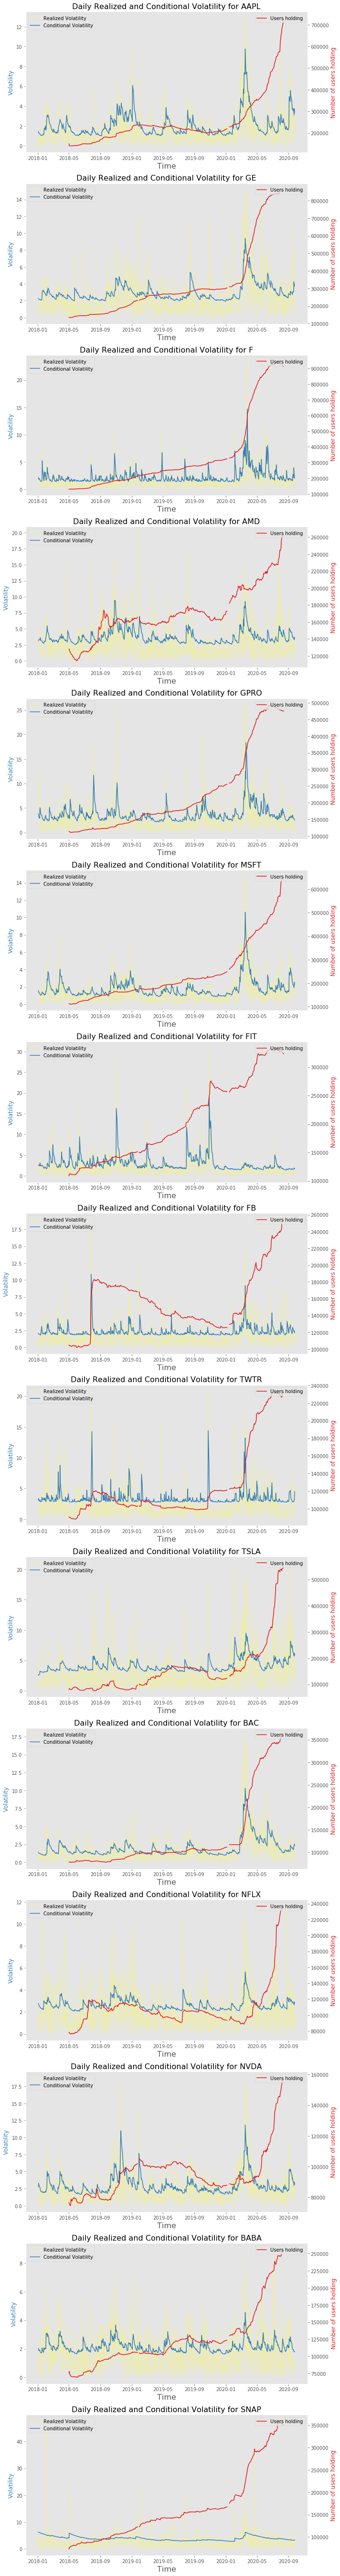

In [15]:
plot_vol(return_df=most_popular_ret, popularity_df=robinhood_popularity[fifteen_most_popular])

### Get stocks prices for some very unpopular stocks on Robinhood

Now, we are looking at the patterns in 15 east popular stocks on Robinhood, as of the start of the dataset.

In [16]:
fifteen_least_popular_start = most_popular_start[-15:].keys().tolist()
get_price_data(tickers=fifteen_least_popular_start)

USLB
Already have USLB
CLTL
Already have CLTL
STPP
Already have STPP
INDU
Already have INDU
DTYL
Already have DTYL
PPTY
Already have PPTY
EFU
Already have EFU
NIQ
Already have NIQ
FLCO
Already have FLCO
FAB
Already have FAB
HVT
Already have HVT
UCHF
Already have UCHF
EVLMC
Already have EVLMC
FCBP
Already have FCBP
FLMB
Already have FLMB


In [17]:
least_popular_prices = compile_price_data(tickers=fifteen_least_popular_start, title_ext='least_popular')
least_popular_ret = get_returns(least_popular_prices)

In [18]:
path="aggregated_daily_data/"
title_ext='least_popular'
file_name = path + 'joined_closes' + title_ext + '.csv'

In [ ]:
plot_vol(return_df=least_popular_ret, popularity_df=robinhood_popularity[fifteen_least_popular_start])

/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001013. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03978. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale)

## Get price data corresponding to the stocks held by Robinhood users

Let us first get price data for all the stocks listed on Robinhood.

In [135]:
get_price_data(tickers=robinhood_popularity.columns.tolist())

RIV
Already have RIV
ANTE
Already have ANTE
CSCO
Already have CSCO
PRI
Already have PRI
SLIM
Already have SLIM
BIOS
Error for BIOS: No data fetched for symbol BIOS using YahooDailyReader.
NZF
Already have NZF
CSUAY
Already have CSUAY
HLNE
Already have HLNE
MQBKY
Already have MQBKY
UNT
Already have UNT
SPXB
Already have SPXB
HUBS
Already have HUBS
GPL
Already have GPL
PSM
Already have PSM
ZURVY
Already have ZURVY
SBGI
Already have SBGI
UFCS
Already have UFCS
TEAF
Already have TEAF
PWCDF
Already have PWCDF
RJZ
Already have RJZ
GFED
Already have GFED
AIRT
Already have AIRT
SITC
Already have SITC
NXN
Already have NXN
BNY
Already have BNY
SPXU
Already have SPXU
PPA
Already have PPA
RHE
Already have RHE
ISSC
Already have ISSC
KNDI
Already have KNDI
EFT
Already have EFT
USTB
Already have USTB
TRNS
Already have TRNS
XOXO
Already have XOXO
XSHD
Already have XSHD
BBSA
Already have BBSA
BCI
Already have BCI
CARO
Already have CARO
BBRE
Already have BBRE
AEIS
Already have AEIS
UAL
Already have UAL


Error for WCG: No data fetched for symbol WCG using YahooDailyReader.
CTRA
Already have CTRA
SWKS
Already have SWKS
USOI
Already have USOI
CHAQ
Already have CHAQ
FRPT
Already have FRPT
ALYA
Already have ALYA
ZGNX
Already have ZGNX
RCKT
Already have RCKT
UCHF
Already have UCHF
WBT
Already have WBT
KRMA
Already have KRMA
SPMB
Already have SPMB
TBPH
Already have TBPH
UCIB
Already have UCIB
NMY
Already have NMY
PPSI
Already have PPSI
MFNC
Already have MFNC
GEL
Already have GEL
IHD
Already have IHD
FRSX
Already have FRSX
LPTH
Already have LPTH
PFM
Already have PFM
VCTR
Already have VCTR
FIEU
Already have FIEU
USAU
Already have USAU
LEAF
Already have LEAF
PREF
Already have PREF
ENPH
Already have ENPH
NCR
Already have NCR
JHMI
Already have JHMI
ITCI
Already have ITCI
KRBN
Already have KRBN
GMOM
Already have GMOM
HWCC
Already have HWCC
BWZ
Already have BWZ
BTA
Already have BTA
KNSA
Already have KNSA
BEAT
Already have BEAT
GIX
Already have GIX
MHLD
Already have MHLD
WBAL
Already have WBAL
IEC
A

Error for BHACU: No data fetched for symbol BHACU using YahooDailyReader.
ATEN
Already have ATEN
ITOCY
Already have ITOCY
SNP
Already have SNP
RYLD
Already have RYLD
STAF
Already have STAF
CEFL
Already have CEFL
LJPC
Already have LJPC
NWGI
Already have NWGI
DON
Already have DON
CIH
Already have CIH
ARW
Already have ARW
CLNY
Already have CLNY
PAGS
Already have PAGS
VIVE
Already have VIVE
VRM
Already have VRM
HCFT
Already have HCFT
SYY
Already have SYY
GENC
Already have GENC
BCOM
Already have BCOM
CLXT
Already have CLXT
CG
Already have CG
SDRL
Already have SDRL
CYAN
Already have CYAN
GLDI
Already have GLDI
HCRF
Already have HCRF
MSI
Already have MSI
BC
Already have BC
RTOKY
Already have RTOKY
CNAT
Already have CNAT
CBTX
Already have CBTX
AX
Already have AX
FCX
Already have FCX
HNP
Already have HNP
WASH
Already have WASH
IMBBY
Already have IMBBY
HLX
Already have HLX
FBK
Already have FBK
SYN
Already have SYN
RWUI
Already have RWUI
B
Already have B
ESIO
Already have ESIO
PARR
Already have P

Already have CEY
OSN
Already have OSN
LOAK
Already have LOAK
CFB
Already have CFB
TCMD
Already have TCMD
TFX
Already have TFX
XPO
Already have XPO
GPAQ
Already have GPAQ
DNO
Already have DNO
SMMU
Already have SMMU
LQDT
Already have LQDT
SMN
Already have SMN
THS
Already have THS
VSL
Already have VSL
VRAI
Already have VRAI
TKOMY
Already have TKOMY
TCCO
Already have TCCO
CHI
Already have CHI
TK
Already have TK
APM
Already have APM
CNTG
Already have CNTG
VT
Already have VT
ARR
Already have ARR
TCBK
Already have TCBK
CIM
Already have CIM
FORK
Already have FORK
QNST
Already have QNST
IPAC
Already have IPAC
JAX
Already have JAX
GILT
Already have GILT
JAPAY
Already have JAPAY
ASA
Already have ASA
MFM
Already have MFM
ULTA
Already have ULTA
THD
Already have THD
BVAL
Already have BVAL
GLPI
Already have GLPI
VRCA
Already have VRCA
MDR
Error for MDR: No data fetched for symbol MDR using YahooDailyReader.
ARE
Already have ARE
VC
Already have VC
CIZ
Already have CIZ
MGI
Already have MGI
MEDS
Already

Error for SCNB: 'Date'.
ADDYY
Already have ADDYY
TCEHY
Already have TCEHY
MHE
Already have MHE
CEM
Already have CEM
TAWK
Already have TAWK
HTHT
Already have HTHT
TTDKY
Already have TTDKY
TDS
Already have TDS
TGH
Already have TGH
ESRT
Already have ESRT
STLG
Already have STLG
PFLT
Already have PFLT
SAN
Already have SAN
NBRV
Already have NBRV
CPSS
Already have CPSS
DBO
Already have DBO
IRTC
Already have IRTC
WTRE
Already have WTRE
HWC
Already have HWC
NBSE
Already have NBSE
MRKR
Already have MRKR
ATHX
Already have ATHX
FXC
Already have FXC
DGRS
Already have DGRS
IUSV
Already have IUSV
CEZ
Already have CEZ
AQUA
Already have AQUA
CLBK
Already have CLBK
CFA
Already have CFA
FAST
Already have FAST
XSW
Already have XSW
DRIV
Already have DRIV
XPL
Already have XPL
MLAB
Already have MLAB
ORI
Already have ORI
EDRY
Already have EDRY
LDSF
Already have LDSF
DAC
Already have DAC
GRVY
Already have GRVY
DBX
Already have DBX
GRUB
Already have GRUB
OMEX
Already have OMEX
STOK
Already have STOK
QEMM
Alread

Error for INNL: 'Date'.
RILY
Already have RILY
TMHC
Already have TMHC
ATCO
Already have ATCO
STFC
Already have STFC
AAXJ
Already have AAXJ
IGEB
Already have IGEB
QQQ
Already have QQQ
IIIN
Already have IIIN
SMIN
Already have SMIN
CLR
Already have CLR
ATV
Already have ATV
RINF
Already have RINF
HMNF
Already have HMNF
TLH
Already have TLH
EQBK
Already have EQBK
LEN.B
Error for LEN.B: 'Date'.
MNSB
Already have MNSB
OXM
Already have OXM
MCR
Already have MCR
CMA
Already have CMA
GNOM
Already have GNOM
CYRN
Already have CYRN
GLTR
Already have GLTR
QSY
Already have QSY
FDEM
Already have FDEM
ATCX
Already have ATCX
FPX
Already have FPX
IPGP
Already have IPGP
FRG
Already have FRG
PFGC
Already have PFGC
VIPS
Already have VIPS
PXLW
Already have PXLW
PG
Already have PG
CNSP
Already have CNSP
CLFD
Already have CLFD
SDOG
Already have SDOG
TAO
Already have TAO
TBT
Already have TBT
IBTX
Already have IBTX
BSTZ
Already have BSTZ
DGS
Already have DGS
MGTX
Already have MGTX
MIXT
Already have MIXT
SCHE
Alre

Error for PAH: 'Date'.
DXCM
Already have DXCM
EZM
Already have EZM
RMCF
Already have RMCF
PROS
Already have PROS
TERP
Already have TERP
BBOX
Already have BBOX
DSPG
Already have DSPG
LUMO
Already have LUMO
VFLQ
Already have VFLQ
LPG
Already have LPG
JDST
Already have JDST
NKX
Already have NKX
BLCT
Already have BLCT
COBZ
Already have COBZ
VSTO
Already have VSTO
NHC
Already have NHC
EXR
Already have EXR
CHGG
Already have CHGG
HIBB
Already have HIBB
KWR
Already have KWR
GDNA
Already have GDNA
PBD
Already have PBD
XFLT
Already have XFLT
GASX
Already have GASX
FNDA
Already have FNDA
WELL
Already have WELL
FNGZ
Already have FNGZ
HYEM
Already have HYEM
HEWY
Already have HEWY
BRKL
Already have BRKL
INR
Already have INR
HRTX
Already have HRTX
DRQ
Already have DRQ
GREK
Already have GREK
TTM
Already have TTM
GLMD
Already have GLMD
KN
Already have KN
NRGO
Already have NRGO
LOPE
Already have LOPE
MLPO
Already have MLPO
IQ
Already have IQ
CLRB
Already have CLRB
ZAGG
Already have ZAGG
VMM
Already have

Error for _OUT: No data fetched for symbol _OUT using YahooDailyReader.
SPEM
Already have SPEM
WHD
Already have WHD
OKTA
Already have OKTA
DXLG
Already have DXLG
SYNC
Already have SYNC
CHII
Already have CHII
BIPC
Already have BIPC
EWX
Already have EWX
GLG
Already have GLG
FLQG
Already have FLQG
AKTS
Already have AKTS
CVCY
Already have CVCY
CACC
Already have CACC
ARYA
Already have ARYA
ITGR
Already have ITGR
OPCH
Already have OPCH
USL
Already have USL
UPW
Already have UPW
NEA
Already have NEA
UCBA
Already have UCBA
BSV
Already have BSV
NTES
Already have NTES
EVK
Already have EVK
ELMD
Already have ELMD
DVAX
Already have DVAX
SYNT
Already have SYNT
XMPT
Already have XMPT
FINV
Already have FINV
FEYE
Already have FEYE
PDYPY
Already have PDYPY
RTN
Already have RTN
PEBK
Already have PEBK
EWO
Already have EWO
CFFI
Already have CFFI
UDEC
Already have UDEC
GLP
Already have GLP
PBDM
Already have PBDM
WIW
Already have WIW
KRKR
Already have KRKR
NIU
Already have NIU
WRLS
Already have WRLS
GTHX
Alre

Error for PNRL: No data fetched for symbol PNRL using YahooDailyReader.
GOSS
Already have GOSS
LYTS
Already have LYTS
OILD
Already have OILD
NEW
Already have NEW
KBAL
Already have KBAL
NXPI
Already have NXPI
LIQT
Already have LIQT
CHIH
Already have CHIH
PMX
Already have PMX
MRWSY
Already have MRWSY
PNC
Already have PNC
TBNK
Already have TBNK
ARMR
Already have ARMR
NPA
Already have NPA
VTIP
Already have VTIP
KMX
Already have KMX
NAII
Already have NAII
FELE
Already have FELE
PPLN
Already have PPLN
EAT
Already have EAT
IWC
Already have IWC
WRTC
Already have WRTC
BGR
Already have BGR
TBLT
Already have TBLT
YRD
Already have YRD
NFLT
Already have NFLT
NSM
Already have NSM
NPV
Already have NPV
GXC
Already have GXC
DMAY
Already have DMAY
BEST
Already have BEST
PRVB
Already have PRVB
SLAB
Already have SLAB
BGIO
Already have BGIO
KOP
Already have KOP
RBB
Already have RBB
FBIO
Already have FBIO
EGIF
Already have EGIF
CMCO
Already have CMCO
SEDG
Already have SEDG
WRK
Already have WRK
RLI
Already h

MUFG
Already have MUFG
CNST
Already have CNST
VISL
Already have VISL
SSBI
Already have SSBI
FCAP
Already have FCAP
ZBH
Already have ZBH
EXIV
Already have EXIV
SIF
Already have SIF
FRC
Already have FRC
CECE
Already have CECE
JFK
Already have JFK
DHX
Already have DHX
UGBP
Already have UGBP
MHGVY
Already have MHGVY
SKY
Already have SKY
RWDE
Already have RWDE
LTRPA
Already have LTRPA
QBAK
Already have QBAK
INMD
Already have INMD
FCCO
Already have FCCO
CME
Already have CME
TCFC
Already have TCFC
QEP
Already have QEP
JRVR
Already have JRVR
XME
Already have XME
VCV
Already have VCV
DQ
Already have DQ
EDNT
Already have EDNT
FN
Already have FN
MBRX
Already have MBRX
MNDO
Already have MNDO
SHBI
Already have SHBI
MITEY
Already have MITEY
VBR
Already have VBR
MYGN
Already have MYGN
RWSL
Already have RWSL
ATTU
Error for ATTU: No data fetched for symbol ATTU using YahooDailyReader.
FDN
Already have FDN
MRVL
Already have MRVL
FFHL
Already have FFHL
UPWK
Already have UPWK
PSHG
Already have PSHG
IBMI
A

Already have CLDR
MNK
Already have MNK
VXF
Already have VXF
URTH
Already have URTH
SMED
Already have SMED
HPI
Already have HPI
SCHL
Already have SCHL
DGZ
Already have DGZ
UEVM
Already have UEVM
CENX
Already have CENX
AMAL
Already have AMAL
TSLF
Already have TSLF
WDRW
Already have WDRW
GBUG
Already have GBUG
AYX
Already have AYX
TMDI
Already have TMDI
MOO
Already have MOO
SGA
Already have SGA
MRLN
Already have MRLN
CRNC
Already have CRNC
HQL
Already have HQL
JJS
Already have JJS
AZBL
Already have AZBL
CEMB
Already have CEMB
JIH
Already have JIH
MBII
Already have MBII
KCDMY
Already have KCDMY
PCTY
Already have PCTY
DMLRY
Already have DMLRY
TCX
Already have TCX
BATRA
Already have BATRA
CCB
Already have CCB
HTLD
Already have HTLD
SCHM
Already have SCHM
SASR
Already have SASR
SFE
Already have SFE
ETSY
Already have ETSY
STKL
Already have STKL
AMCR
Already have AMCR
PFHD
Already have PFHD
SMDV
Already have SMDV
QBIEY
Already have QBIEY
ATOS
Already have ATOS
QRHC
Already have QRHC
DGL
Already

Error for BWL.A: No data fetched for symbol BWL.A using YahooDailyReader.
GAL
Already have GAL
CHEF
Already have CHEF
HEWG
Already have HEWG
BRKR
Already have BRKR
DALI
Already have DALI
ROYT
Already have ROYT
HYDW
Already have HYDW
UMAY
Already have UMAY
WFC
Already have WFC
WEX
Already have WEX
SPHQ
Already have SPHQ
CTVA
Already have CTVA
FNGD
Already have FNGD
OPNT
Already have OPNT
OUSM
Already have OUSM
DTUS
Already have DTUS
RYE
Already have RYE
ANDV
Already have ANDV
PAA
Already have PAA
AXNX
Already have AXNX
SOHU
Already have SOHU
FKO
Already have FKO
IO
Already have IO
MXE
Already have MXE
CVV
Already have CVV
JT
Already have JT
MLPQ
Already have MLPQ
GBCI
Already have GBCI
HOMB
Already have HOMB
BCDA
Already have BCDA
MZZ
Already have MZZ
SHLL
Already have SHLL
AAAU
Already have AAAU
DPG
Already have DPG
MIND
Already have MIND
SEOAY
Already have SEOAY
PDEC
Already have PDEC
LSAC
Already have LSAC
BSCN
Already have BSCN
VMD
Already have VMD
CUZ
Already have CUZ
IX
Already ha

Error for BIO.B: 'Date'.
BELFA
Already have BELFA
DSKE
Already have DSKE
NSA
Already have NSA
BEPC
Already have BEPC
SBNY
Already have SBNY
KNX
Already have KNX
ROAD
Already have ROAD
RTTR
Already have RTTR
RVLV
Already have RVLV
ELVT
Already have ELVT
DOTA
Error for DOTA: 'Date'.
ARCB
Already have ARCB
LEN
Already have LEN
RFDA
Already have RFDA
BHF
Already have BHF
WSC
Already have WSC
WINA
Already have WINA
WPX
Already have WPX
BIB
Already have BIB
ELTK
Already have ELTK
EOD
Already have EOD
PWZ
Already have PWZ
FITB
Already have FITB
EML
Already have EML
PVI
Already have PVI
WST
Already have WST
ORBC
Already have ORBC
CCCL
Already have CCCL
IAGG
Already have IAGG
GWW
Already have GWW
EOS
Already have EOS
TEDU
Already have TEDU
PPBI
Already have PPBI
PTE
Already have PTE
MSGN
Already have MSGN
KBH
Already have KBH
FRBK
Already have FRBK
IYW
Already have IYW
ENLK
Already have ENLK
BIF
Already have BIF
ARAY
Already have ARAY
WSG
Already have WSG
MAXR
Already have MAXR
BHB
Already have

DWLD
PSLV
KCNY
SFIX
JIGB
CL
FTSV
CNBS
VFC
IEMV
MRSN
SANM
WTIU
AVID
SYE
CPHC
IBIO
I
HAHA
EVGBC
MBWM
STBA
HFXJ
FDBC
SLS
FORR
GLPG
CIT
CLNE
MFC
TR
APT
FMHI
QUS
Already have QUS
EVBG
ZDEU
UA
BMTC
VZ
MGP
NKTR
ASX
MFT
JCI
FVE
WAFU
NWHM
FXN
SMCP
OTIC
CBON
ZN
MKD
CEW
BOCH
TTOO
HAPP
KELYA
MKGI
DAN
EAOM
IETC
CPSI
SOXX
GRWG
DCF
FXY
JPSE
ADME
UUGRY
OSW
MHH
ASND
TGE
ZIV
HCHC
EXAS
ATIF
SMBC
PQLC
DBB
PSTG
FSLR
WTRH
ESRX
LAND
CLCT
CBMG
CDE
VRME
DBC
DAX
BFIT
XBIT
AMGN
NNDM
OCIO
AZEK
MHI
CEA
CDR
CBNK
GUSH
XP
INDS
TGS
CPSH
GEVO
AVRO
DAO
FXO
DCP
SCJ
CRIS
ACHN
Error for ACHN: No data fetched for symbol ACHN using YahooDailyReader.
QGTA
TEL
ADMS
CEV
UNAM
MEN
TD
APB
BXMX
CUBE
FVD
HYS
JBL
CREG
VIVO
FORD
CIB
VST
ILPT
JW.B
Error for JW.B: No data fetched for symbol JW.B using YahooDailyReader.
JKHY
TS
OSBC
WH
HSAQ
RNLC
SOI
HYD
ECYT
MGF
VRP
FMIL
ADAP
VUSE
FAZ
MIDF
H
JPHY
AE
SFTBY
CERC
NUHY
NBHC
FAM
ECON
JTA
_PRN
Error for _PRN: No data fetched for symbol _PRN using YahooDailyReader.
CM
ADP
MSC
REIS
MPX
AR
GLNCY


CHCT
IIM
RCKY
TNDM
ORSN
NOK
SPLK
WAB
SPMO
KROS
AIEQ
NMT
EEMD
IHI
SBSW
GSID
SUPV
NMCO
LGVW
KRE
WJRYY
MURGY
LRMR
PLAG
CTSH
LTC
ARQT
CODA
EEMS
IAUF
ICMB
TRVN
DOGS
KSA
FLY
AMRK
STG
DYNF
QLC
JPGE
HMST
IBDM
OFS
ESEB
TSE
CWBC
JYNT
DWAQ
GLPEY
AZPN
SONG
Error for SONG: No data fetched for symbol SONG using YahooDailyReader.
FNF
SWK
SOLO
FLN
CNNB
REET
CRL
WSBF
MU
NRBO
MNLO
NEBU
TRV
JPEM
PBR.A
Error for PBR.A: No data fetched for symbol PBR.A using YahooDailyReader.
INSI
CPS
NUEM
DWAHY
MKSI
MRSK
WCHN
FCA
CGIX
HNI
SCVL
MSP
AA
VFF
L
LCNB
UBNK
Error for UBNK: No data fetched for symbol UBNK using YahooDailyReader.
CNCR
AGX
ADC
IPWR
EMAN
OXFD
OVID
PSNL
EMCF
WIMHY
DYAI
IEMD
XHB
GBIO
SFHY
AEP
AFK
FTSD
LATN
PTIN
ADT
MRC
CNCE
AGO
CI
SHCAY
JPIN
PDLI
ACRS
MIDU
ATRI
FBR
AQB
CIF
MGU
DEEP
CISN
VNQI
CUBA
TKC
VRT
WHLM
MDY
RNMC
DOW
SLV
LQDH
QVM
FUL
CHU
TW
THO
NICK
CEE
OPI
BANR
ASNA
JNK
JMP
KALV
RYAM
STOT
PHAT
FFTI
FYX
SCON
FARO
FTHY
XENE
SVVC
STNG
FSMD
KALA
IPOC
TDIV
HSMV
DBP
LSST
IGLB
RYCE
NEWT
RESN
XT
ORA
SAP


## Some price data could not be retrieved. How much price data have we obtained, as a % of shared held?

In [21]:
tickers

['RIV.csv',
 'ANTE.csv',
 'CSCO.csv',
 'PRI.csv',
 'SLIM.csv',
 'BIOS.csv',
 'NZF.csv',
 'CSUAY.csv',
 'HLNE.csv',
 'MQBKY.csv',
 'UNT.csv',
 'SPXB.csv',
 'HUBS.csv',
 'GPL.csv',
 'PSM.csv',
 'ZURVY.csv',
 'SBGI.csv',
 'UFCS.csv',
 'TEAF.csv',
 'PWCDF.csv',
 'RJZ.csv',
 'GFED.csv',
 'AIRT.csv',
 'SITC.csv',
 'NXN.csv',
 'BNY.csv',
 'SPXU.csv',
 'PPA.csv',
 'RHE.csv',
 'ISSC.csv',
 'KNDI.csv',
 'EFT.csv',
 'USTB.csv',
 'TRNS.csv',
 'XOXO.csv',
 'XSHD.csv',
 'BBSA.csv',
 'BCI.csv',
 'CARO.csv',
 'BBRE.csv',
 'AEIS.csv',
 'UAL.csv',
 'TROW.csv',
 'ISRG.csv',
 'EGP.csv',
 'TRND.csv',
 'QDIV.csv',
 'EFC.csv',
 'EEX.csv',
 'NVR.csv',
 'DDLS.csv',
 'FLAX.csv',
 'PLYM.csv',
 'RDVY.csv',
 'TELA.csv',
 'EWJE.csv',
 'FEIM.csv',
 'WOR.csv',
 'TLRY.csv',
 'PRGO.csv',
 'LECO.csv',
 'VONG.csv',
 'ALTG.csv',
 'RPT.csv',
 'VCYT.csv',
 'USAC.csv',
 'HYLB.csv',
 'OIIL.csv',
 'COHN.csv',
 'NBW.csv',
 'PLOW.csv',
 'PIC.csv',
 'PRGX.csv',
 'ERF.csv',
 'IFN.csv',
 'FIHD.csv',
 'RSX.csv',
 'PHG.csv',
 'UVE.cs

## Getting the "Robinhood portfolio" weights

Now, let us compute the aggregated Robinhood portfolio weights for any given moment. This portfolio construction will assume that the number of Robinhood users that hold any particular stocks is proportional to the number of that stock that they collectively hold. This is because we only know the number of users who own a given stock;our dataset does not explicitly mention how many shares of that stock they collectively own. 

### How much data we got to construct the portfolio

In [37]:
time_0_shares = robinhood_popularity.iloc[0, :].fillna(0)
total_shares = time_0_shares.sum()
missing = 0
for i in range(len(time_0_shares)):
    ticker = time_0_shares.index[i]
    if (not os.path.exists('stock_dfs/{}.csv'.format(ticker))):
        missing += time_0_shares.iloc[i]
        print('{} is missing.'.format(ticker))
print("We have data for {} % of the shares.".format(100 - 100 * missing / total_shares))

BIOS is missing.
HVT.A is missing.
BRK.B is missing.
EACQ is missing.
WCG is missing.
BPMX is missing.
HLTH is missing.
HIIQ is missing.
NAO is missing.
BRK.A is missing.
BHACU is missing.
GGP is missing.
MOSC is missing.
MDR is missing.
YUMA is missing.
BWINA is missing.
SBGL is missing.
LLL is missing.
VMAX is missing.
SCNB is missing.
VLRX is missing.
ALZH is missing.
BWINB is missing.
NXEO is missing.
INNL is missing.
LEN.B is missing.
ESTR is missing.
STZ.B is missing.
OIBR.C is missing.
CTAC is missing.
PVT is missing.
PAH is missing.
OHRP is missing.
_OUT is missing.
CIG.C is missing.
AMMA is missing.
XON is missing.
ONP is missing.
BF.A is missing.
PNRL is missing.
ATTU is missing.
BF.B is missing.
SPEX is missing.
CRD.B is missing.
BH.A is missing.
ALO is missing.
RDS.B is missing.
BRPM is missing.
BWMC is missing.
TAP.A is missing.
CRD.A is missing.
BWL.A is missing.
MNI is missing.
CCA is missing.
SGB is missing.
RDS.A is missing.
BIO.B is missing.
DOTA is missing.
WSO.B is 

### Portfolio construction

In [74]:
riv_popularity = robinhood_popularity['RIV']
riv_popularity.index = pd.to_datetime(riv_popularity.index)
riv_popularity

timestamp
2018-05-02     65
2018-05-03     64
2018-05-04     64
2018-05-05     64
2018-05-06     64
             ... 
2020-08-09    389
2020-08-10    391
2020-08-11    387
2020-08-12    395
2020-08-13    395
Name: RIV, Length: 818, dtype: int64

In [90]:
riv_price = pd.read_csv("stock_dfs/RIV.csv")
riv_price['Date'] = pd.to_datetime(riv_price['Date']).dt.date
riv_price.set_index('Date', inplace=True)
riv_price.rename(columns={'Adj Close': 'RIV'}, inplace=True)
riv_price.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
# riv_price.loc[riv_popularity.index[0], :]

In [92]:
riv_price.index[0]

datetime.date(2018, 1, 2)

In [82]:
riv_price.index[80:89][3]

datetime.date(2018, 5, 2)

In [89]:
riv_price.loc[dt.date(2018, 5, 2), :]

RIV    15.085953
Name: 2018-05-02, dtype: float64

In [65]:
robinhood_popularity

,RIV,ANTE,CSCO,PRI,SLIM,BIOS,NZF,CSUAY,HLNE,MQBKY,...,NVCN,OBCI,ROKU,ARDC,ARGX,CABGY,MTDR,BWEN,TIVO,KEM
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-02,65,NaN,23646,222,69.0,NaN,86,NaN,126,NaN,...,NaN,104,12965,2,NaN,NaN,85,456,NaN,2593.0
2018-05-03,64,NaN,23718,230,70.0,NaN,89,NaN,131,NaN,...,NaN,103,13188,2,NaN,NaN,89,457,NaN,2658.0
2018-05-04,64,NaN,23553,230,70.0,NaN,88,NaN,137,NaN,...,NaN,104,13165,4,NaN,NaN,90,458,NaN,2620.0
2018-05-05,64,NaN,23552,230,70.0,NaN,88,NaN,137,NaN,...,NaN,104,13165,4,NaN,NaN,90,458,NaN,2620.0
2018-05-06,64,NaN,23552,230,70.0,NaN,88,NaN,137,NaN,...,NaN,104,13165,4,NaN,NaN,90,458,NaN,2620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-09,389,949.0,60672,1116,NaN,NaN,250,299.0,118,66.0,...,1765.0,836,51153,166,429.0,339.0,11981,1034,0.0,NaN
2020-08-10,391,944.0,61070,1127,NaN,NaN,249,307.0,119,69.0,...,1841.0,836,51425,166,424.0,338.0,11855,1018,0.0,NaN
2020-08-11,387,931.0,61311,1133,NaN,NaN,248,303.0,118,69.0,...,1813.0,835,51026,163,425.0,336.0,11739,1015,0.0,NaN


## Get the corresponding stock prices 